## WeRateDogs Report

  This report is the culmination of an extensive data wrangling and analysis process, that involved gathering data for tweets in the [WeRateDogs](https://twitter.com/dog_rates) archive, formatting and cleaning the data to make it fit-for-purpose, and finally, exploring the cleaned dataset in order to observe patterns and answer questions that might have piqued the interest of the analyst.  
  
   A document detailing what was done in the data gathering and wrangling phases of this project can be found [here](https://drive.google.com/file/d/10PqXbGRY3lBjNz7VaV-O84eva5LAp_pK/view?usp=sharing)  
  In this post, we will be looking at the exploratory analysis carried out, the insights derived from these analyses, and visualizations that were generated where necessary. Let's dive right into it.
  
---
Both datasets for the twitter archive and image predictions contained 1986 records after the cleaning was done.  

Plotting the twitter archive dataset as a scatter matrix yielded the visualization below

```python
>>> plt.figure(dpi = 75)
>>> pd.plotting.scatter_matrix(archive_enhanced_clean, figsize = (8,8), color = 'k');
```
![Scatter Matrix](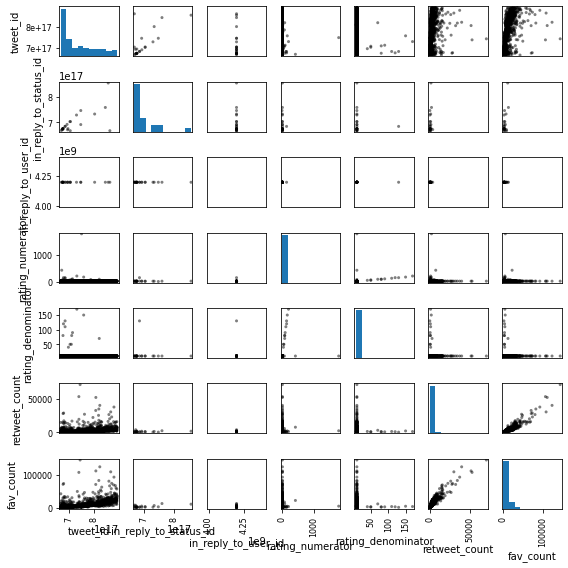 "Scatter Matrix")


---
Glancing through the 2 cleaned datasets, several questions immediately begged for answers. The rest of this post is dedicated to asking those questions and the answers I got.  

<b>Retweets</b>  
* <span style="color:green;font-weight:700;font-size:20px">2,244</span>: That was the average number of retweets the WeRateDogs account got per tweet
* Their most engaged content in terms of retweets had <span style="color:green;font-weight:700;font-size:20px">70,747</span> retweets
* Their least engaged content in terms of retweets had <span style="color:red;font-weight:700;font-size:20px">11</span> retweets  
* How did the number of retweets they were receiving change with time?  
```python
>>> plt.figure(figsize = (8,6))
>>> plt.scatter(archive_enhanced_clean.timestamp, archive_enhanced_clean.retweet_count, color = 'g', alpha = .5, s = np.log(archive_enhanced_clean.retweet_count)*5)
>>> plt.yscale('log')
>>> plt.xlabel('Date of Tweet', fontsize = 12)
>>> plt.ylabel('Retweets', fontsize = 12)
>>> plt.title('Retweet counts over time', fontsize = 15);
```
![Retweets over time](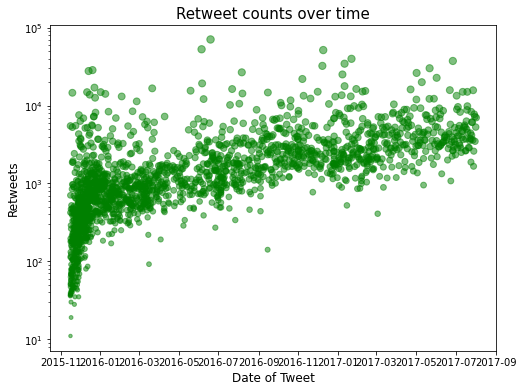 "Retweets over time")  
On average, the amount of retweets gotten by WeRateDogs tweets increased over time, as seen above  
  
<b>Favourites/Likes</b>
* <span style="color:blue;font-weight:700;font-size:20px">7,711</span> was the average number of likes the WeRateDogs account got per tweet
* Their most engaged content in terms of likes had <span style="color:blue;font-weight:700;font-size:20px">144,902</span> likes
* Their least engaged content in terms of likes had <span style="color:red;font-weight:700;font-size:20px">66</span> likes  
* How did the number of likes they were receiving change with time?  
```python
>>> plt.figure(figsize = (8,6))
>>> plt.scatter(archive_enhanced_clean.timestamp, archive_enhanced_clean.fav_count, color = 'blue', alpha = .5, s = np.log(archive_enhanced_clean.retweet_count)*5)
>>> plt.yscale('log')
>>> plt.xlabel('Date of Tweet', fontsize = 12)
>>> plt.ylabel('Likes', fontsize = 12)
>>> plt.title('Like counts over time', fontsize = 15);
```
![Likes over time](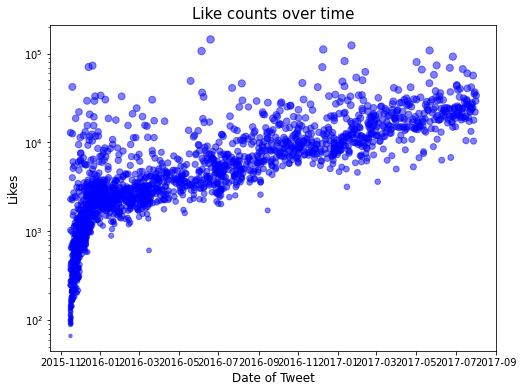 "Likes over time")  
  
<b>Was there any relationship between the amount of retweets they get and the amount of likes a tweet will eventually get?</b>  
The chart below seems to think so.  
```python
>>> archive_enhanced_clean.plot('retweet_count', 'fav_count', kind = 'scatter', figsize = (8,6), color = 'g',
                           title = 'Likes vs Retweets', alpha = .6, s = 4* np.log(archive_enhanced_clean.fav_count));
```
![Relationship between Likes and Retweets](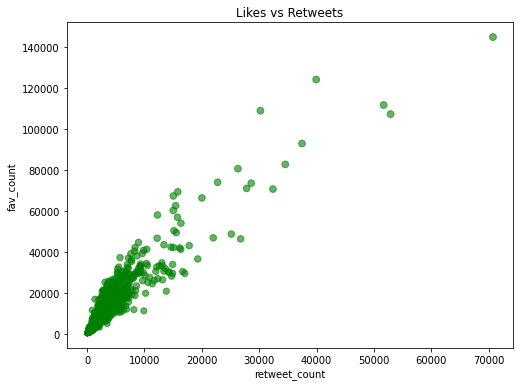 "Likes and Retweets")

<b>Image Prediction</b>
* <span style="color:orange;font-weight:2000;font-size:40px">74%</span>: That was how often the first prediction was a dog breed  
* The average confidence level of the model's first prediction is <span style="color:orange;font-weight:700;font-size:20px">59.3%</span>
* Which image predictions had the highest confidence level on average?  
```python
>>> conf_levels = image_predictions_clean.groupby('p1').mean()['p1_conf'].sort_values(ascending = False)
>>> plt.figure(figsize = (8, 12))
>>> plt.barh(conf_levels.index[:50], conf_levels[:50], color = 'k', alpha = .8);
```
![Predictions with the highest confidence level](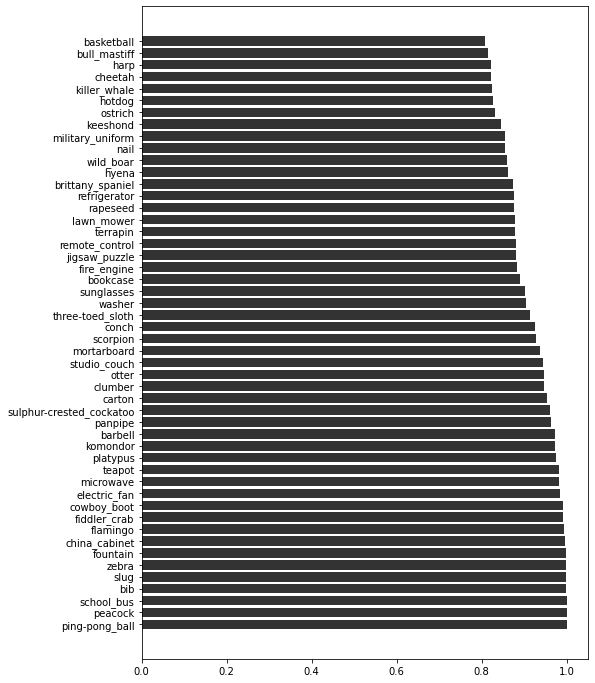 "Predictions with the highest confidence level")  
Turn out they are not dog breeds

---

There are many other questions that could be asked, lots of information that could still be coaxed out of this dataset, and I hope you had as much fun going through this as I had creating it.  

[back to top](#WeRateDogs-Report)